## Created by Jessie McDonald and used in Mcdonald and Weiss 2021. Optimized for PERiLS data by Joshua Ostaszewski and used in Ostaszewski et al. 2025.

In [1]:
import pandas as pd
import datetime as dt
from functions import calc_dewpoint, calc_thetae, calc_thetav
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as md
import glob
import matplotlib.pyplot as plt
from itertools import groupby

In [15]:
%pylab inline
#Change to directory with SN metadata, approximate cold pool TOA, storm motion, and reflectivity angles.
SNSfile = '/Volumes/JoshDrive/PERiLS_Y1/Excel_SN/Before_CPA/PERiLS_IOP2_thermo.xlsx' 
sns = pd.read_excel(SNSfile)
savedir = '' #Change to your own directory

IOP = 'IOP2' #Switch to a specific IOP

#Function that grabs 1Hz data for a respective date, SN, and period of time
def get_1hz(date, probe, starttime, duration, seconds=False):
    directory= '/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/*.txt'
    all_sn = glob.glob(f"{directory}")
    all_sn.sort()
    print(probe)
    print(all_sn[probe])
    data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
    if seconds == False:
       # handle when data from two days is needed
        s = (starttime-dt.timedelta(minutes=1))
        e = (starttime+dt.timedelta(minutes=duration))
        return data[starttime:starttime+dt.timedelta(minutes=duration)]
    if seconds == True:
       # handle when data from two days is needed
        s = (starttime-dt.timedelta(minutes=1))
        e = (starttime+dt.timedelta(seconds=duration))
        return data[starttime:starttime+dt.timedelta(seconds=duration)]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Find TOA

Manually set delta_k for each event/whole project. This value is arbitrary. It is the change in temp that is used to determine the cold pool edge location. In the CSV, the TOA_coldpool column is an approximate TOA. This code takes that approximate time and finds a more accurate TOA. If 0.3K does not work, the code will check 0.2k and 0.1K before failing.

In [16]:
sns #look at TimeToSpace.ipynb for description of each variable

,IOP,date,ID,lat,lon,array_type,mode,MC_rel_toa,type,tor,...,TOA_coldpool_final,TOA_mods,Threshold,U,V,ref_angle,ref_contour,SM_mods,ref_mods,BS_mods
0,2,2022-03-30,101A,33.890050,-89.019192,Coarse,Mesovortex,NaN,R,NT,...,2022/03/30 2259,NaN,-3,16.7,23.8,9.9,46,NaN,NaN,NaN
1,2,2022-03-30,102A,33.167592,-88.539054,Coarse,Mesovortex,NaN,R,TOT,...,2022/03/31 0057,NaN,-3,18.7,21.3,-15.0,40,NaN,NaN,NaN
2,2,2022-03-30,103A,33.714987,-88.450477,Fine,Mesovortex,NaN,R,TOT,...,2022/03/31 0023,NaN,-3,16.0,24.0,-17.3,43,NaN,NaN,NaN
3,2,2022-03-30,104A,33.818643,-88.461089,Fine,Mesovortex,NaN,R,TOT,...,2022/03/31 0021,NaN,-3,18.7,24.0,-17.1,43,NaN,1.0,NaN
4,2,2022-03-30,105A,33.535339,-89.124273,Coarse,Mesovortex,NaN,R,NT,...,2022/03/30 2257,NaN,-3,16.7,19.0,-12.8,40,NaN,NaN,NaN
5,2,2022-03-30,106A,33.888094,-88.729118,Coarse,Mesovortex,NaN,R,NT,...,2022/03/30 2334,NaN,-3,19.0,23.8,-15.3,40,NaN,NaN,NaN
6,2,2022-03-30,107A,33.588088,-88.666433,Coarse,Mesovortex,NaN,R,NT,...,2022/03/31 0001,NaN,-3,15.2,20.3,-16.0,43,NaN,NaN,NaN
7,2,2022-03-30,108A,34.178948,-89.032192,Coarse,Mesovortex,NaN,R,Post,...,2022/03/30 2259,NaN,-3,16.7,26.2,-8.0,40,NaN,NaN,NaN
8,2,2022-03-30,109A,34.267943,-88.767288,Coarse,Mesovortex,NaN,R,NT,...,2022/03/30 2319,NaN,-3,17.2,22.1,-2.4,45,NaN,-1.0,NaN
9,2,2022-03-30,110A,33.757437,-88.445230,Fine,Mesovortex,NaN,R,TOT,...,2022/03/31 0023,NaN,-3,18.7,26.7,-16.3,40,NaN,NaN,NaN


101A
0
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0101A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

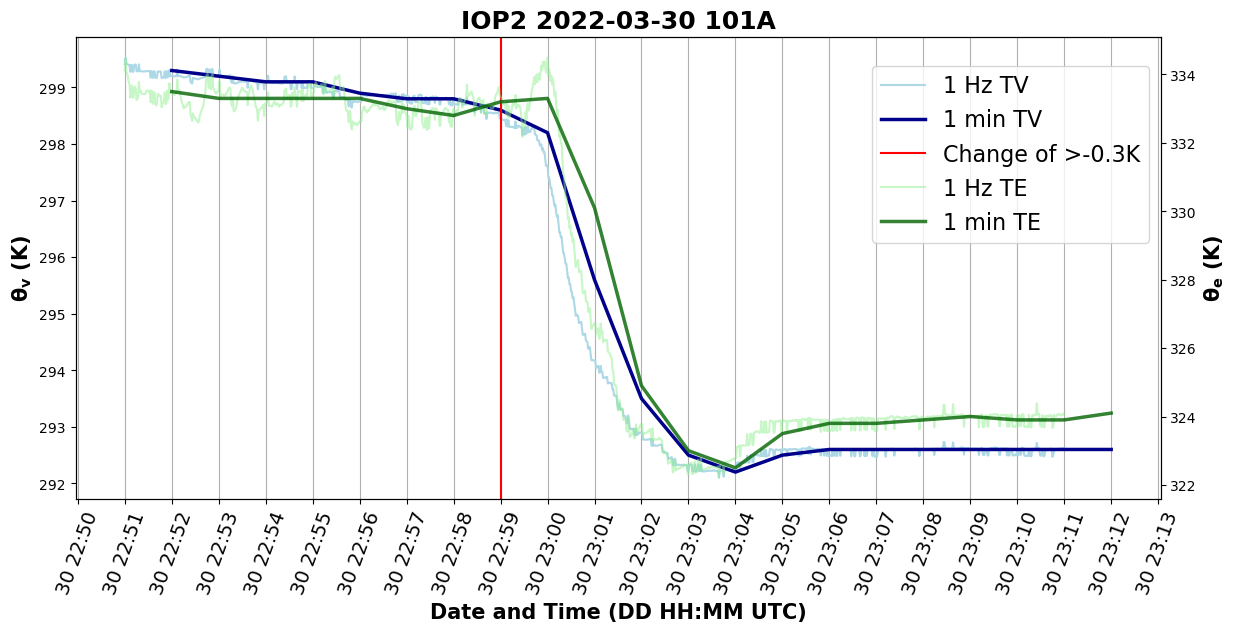

102A
1
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0102A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

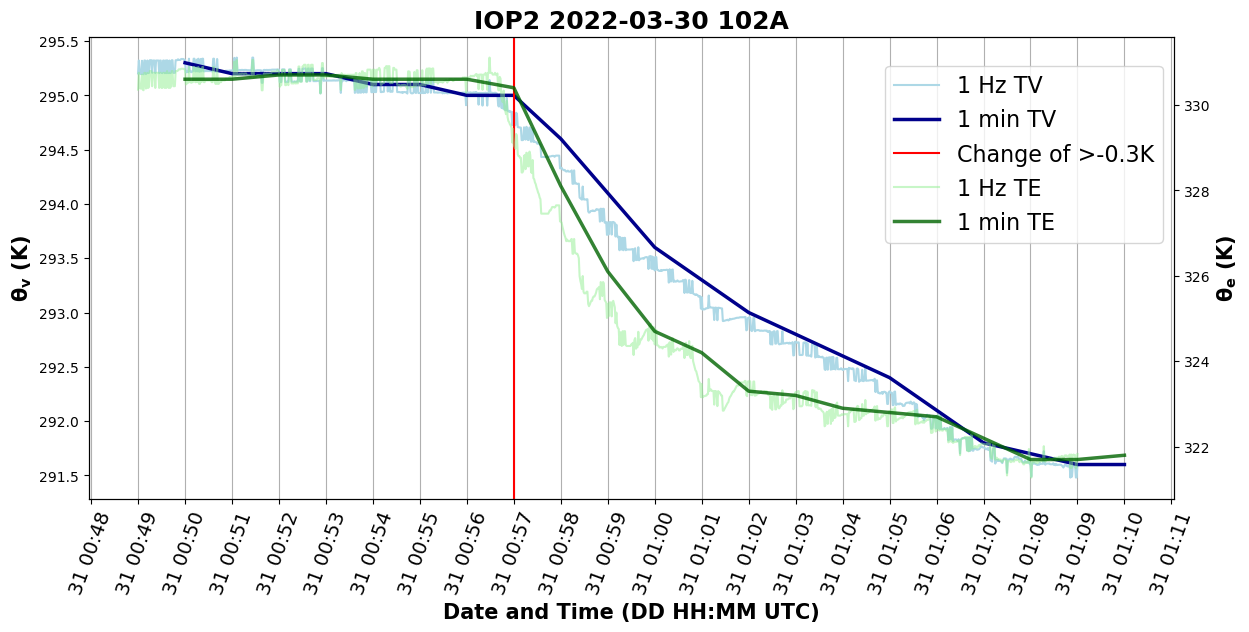

103A
2
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0103A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

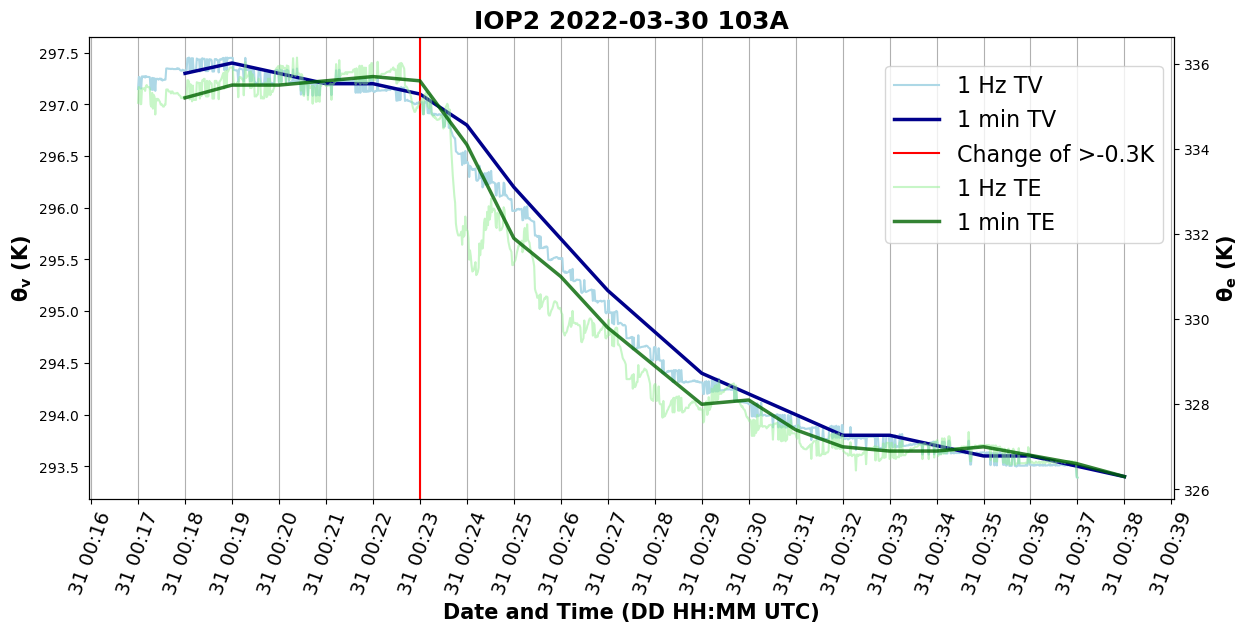

104A
3
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0104A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

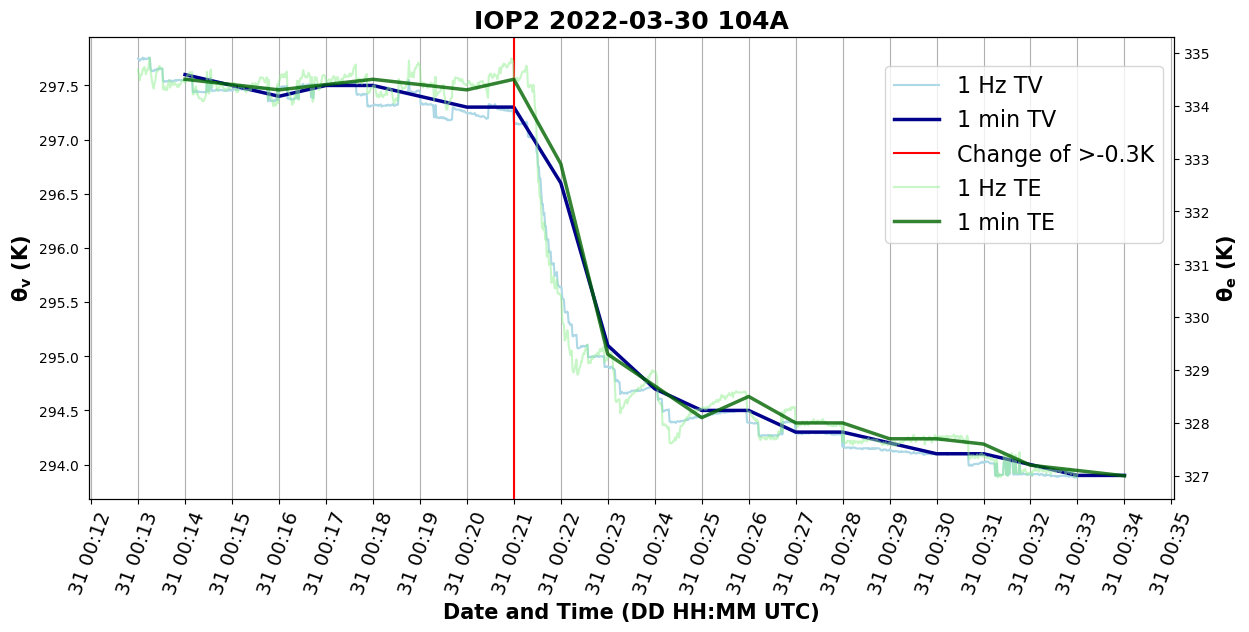

105A
4
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0105A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

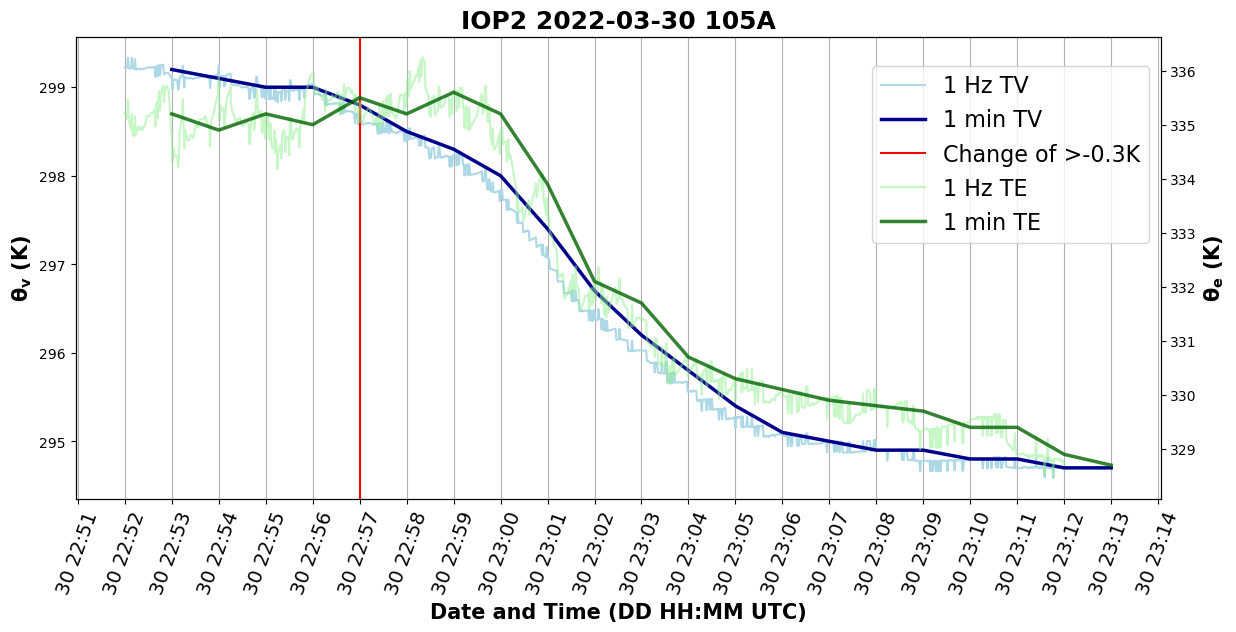

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


106A
5
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0106A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff1 = tv_1min[i+1] - tv_1min[i]


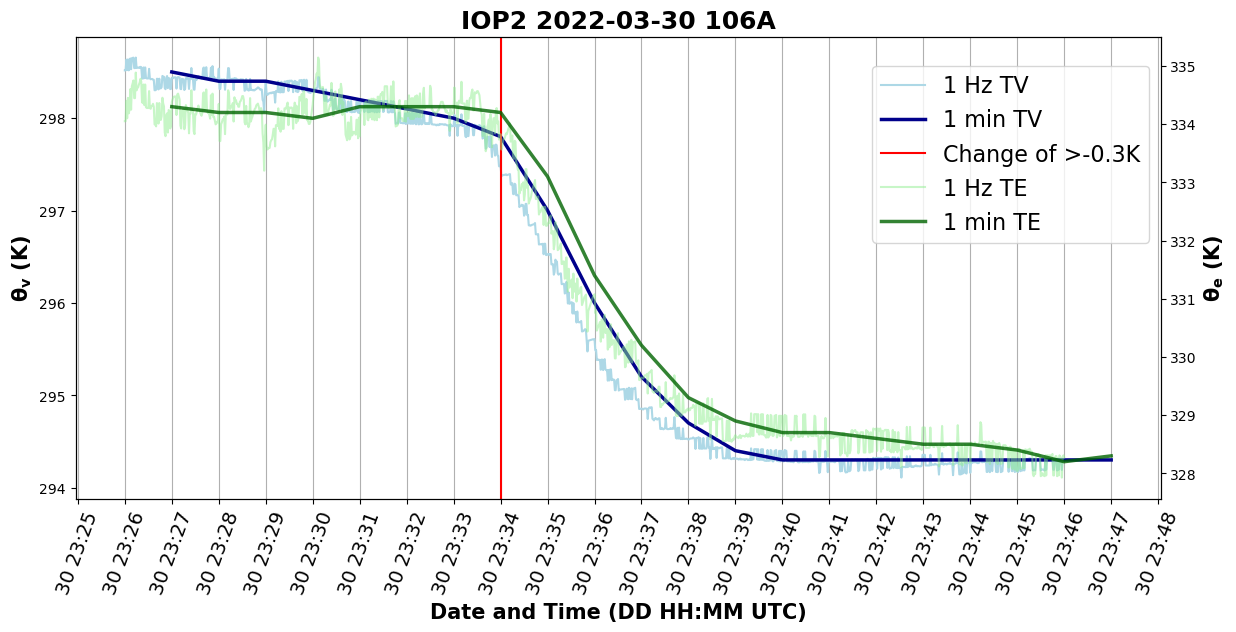

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


107A
6
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0107A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff1 = tv_1min[i+1] - tv_1min[i]


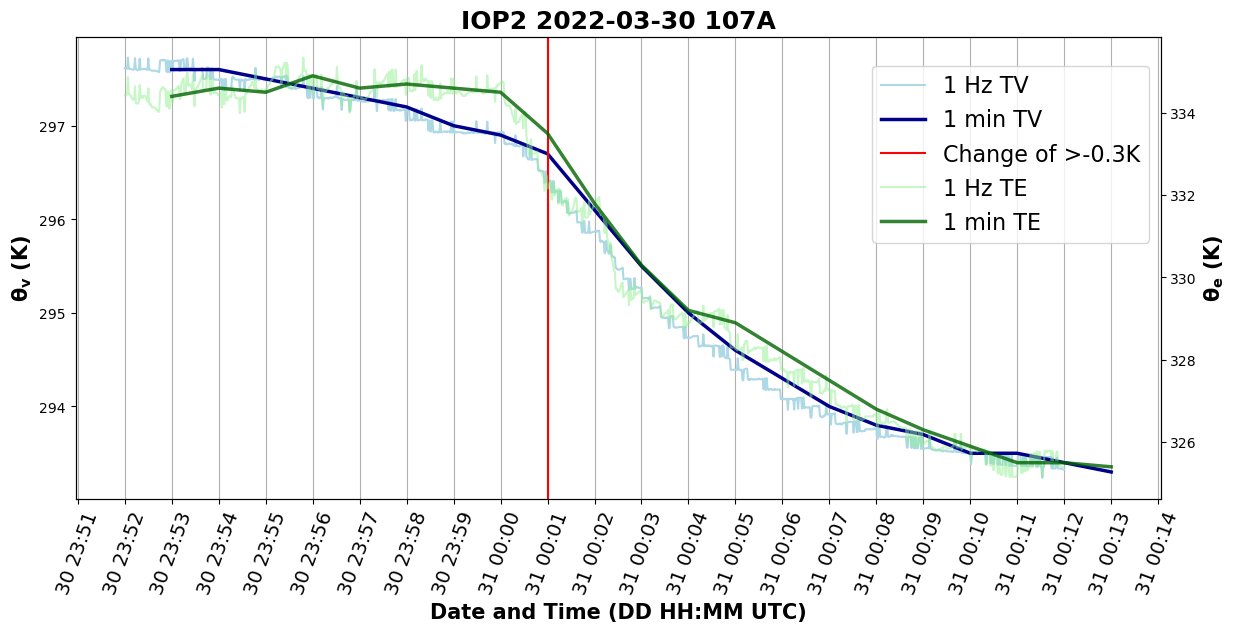

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


108A
7
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0108A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff1 = tv_1min[i+1] - tv_1min[i]


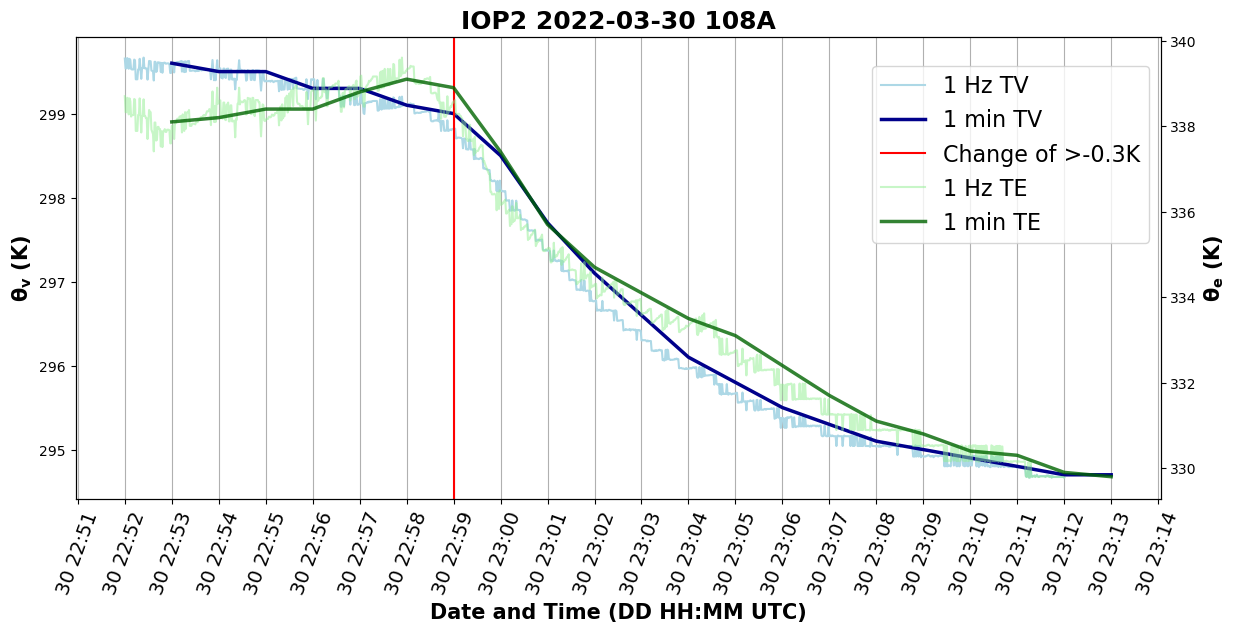

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


109A
8
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0109A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff1 = tv_1min[i+1] - tv_1min[i]


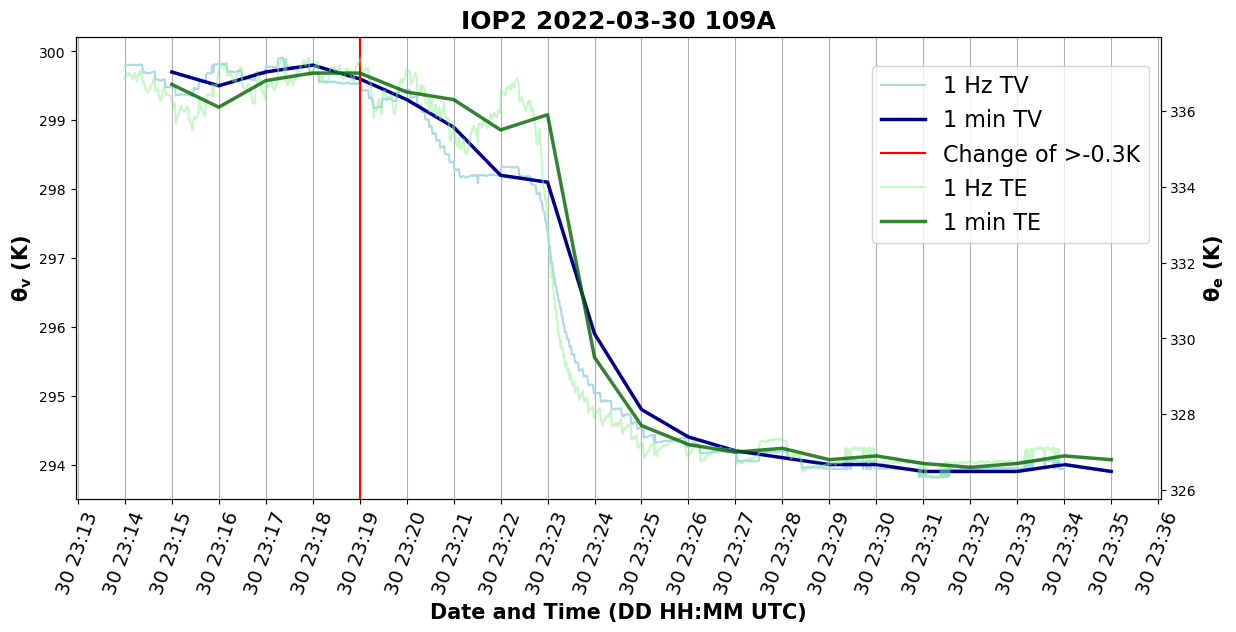

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

110A
9
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0110A_level3.txt


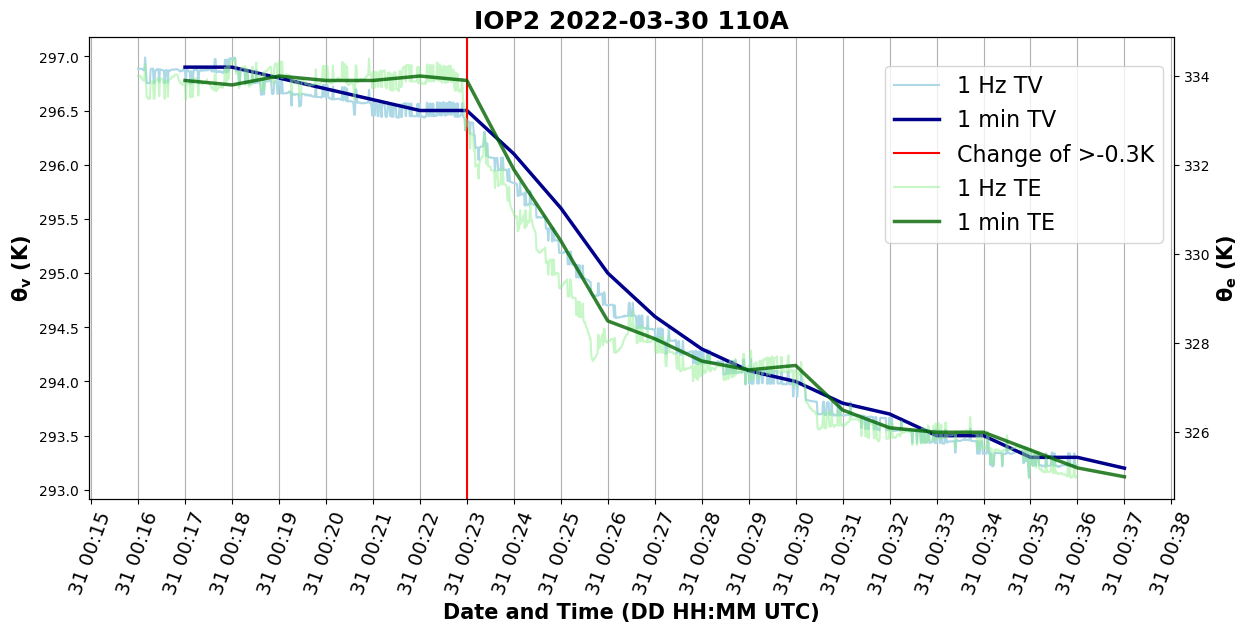

111A
10
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0111A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

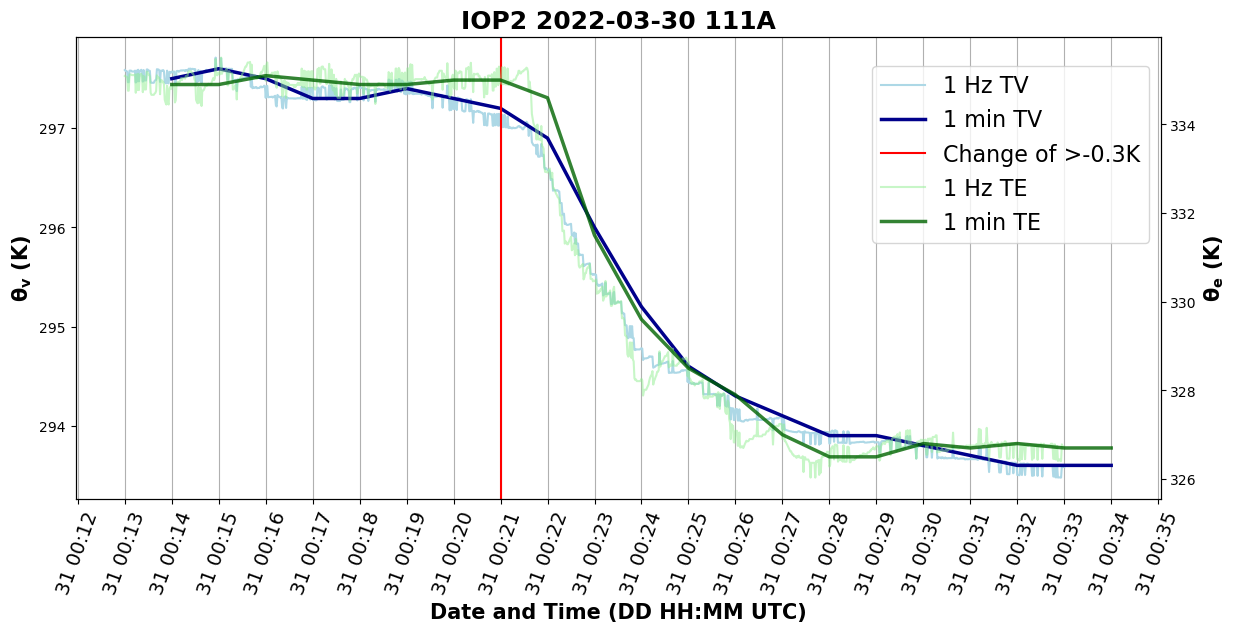

112A
11
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0112A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

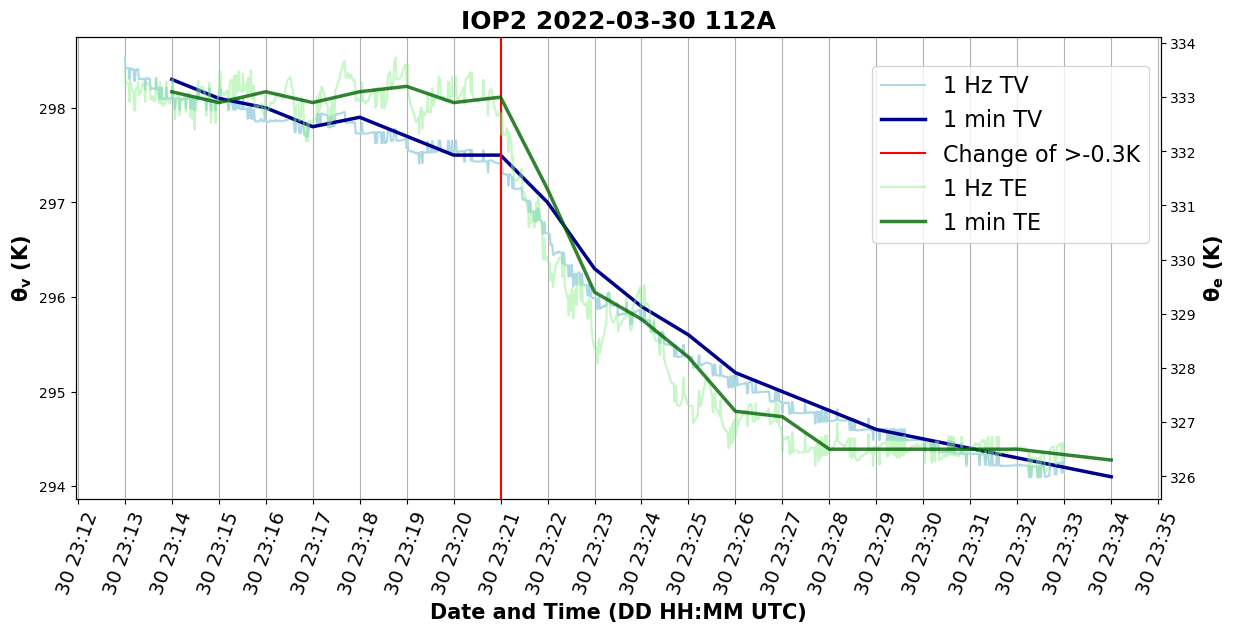

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

213A
12
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0213A_level3.txt


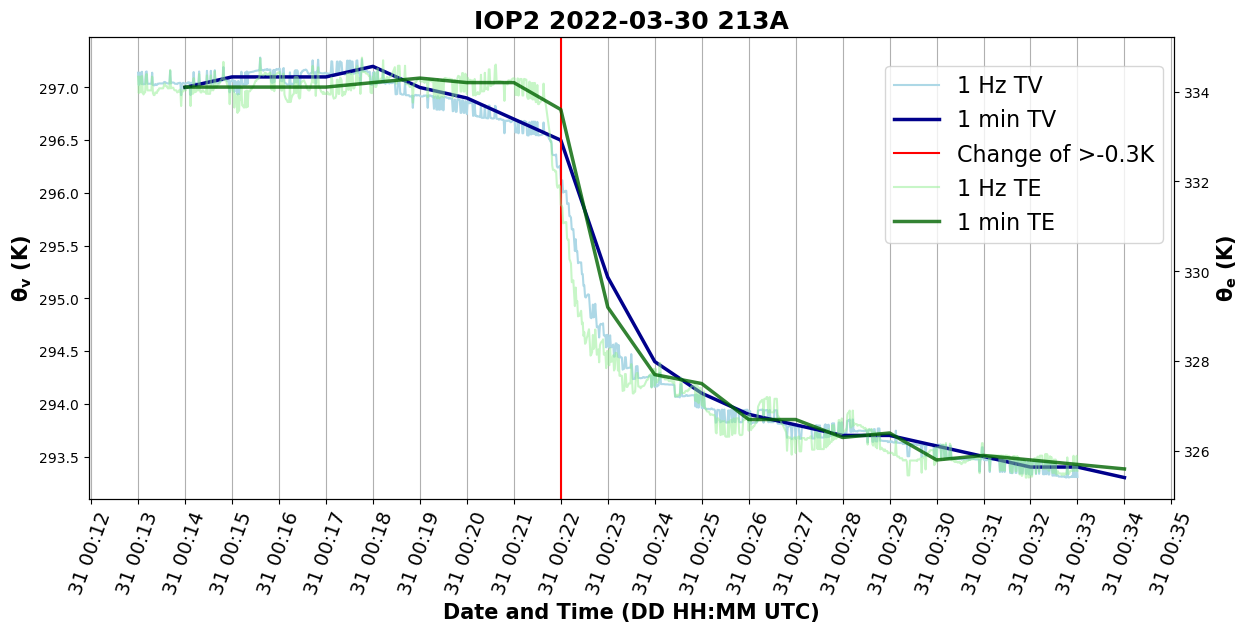

214A
13
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0214A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

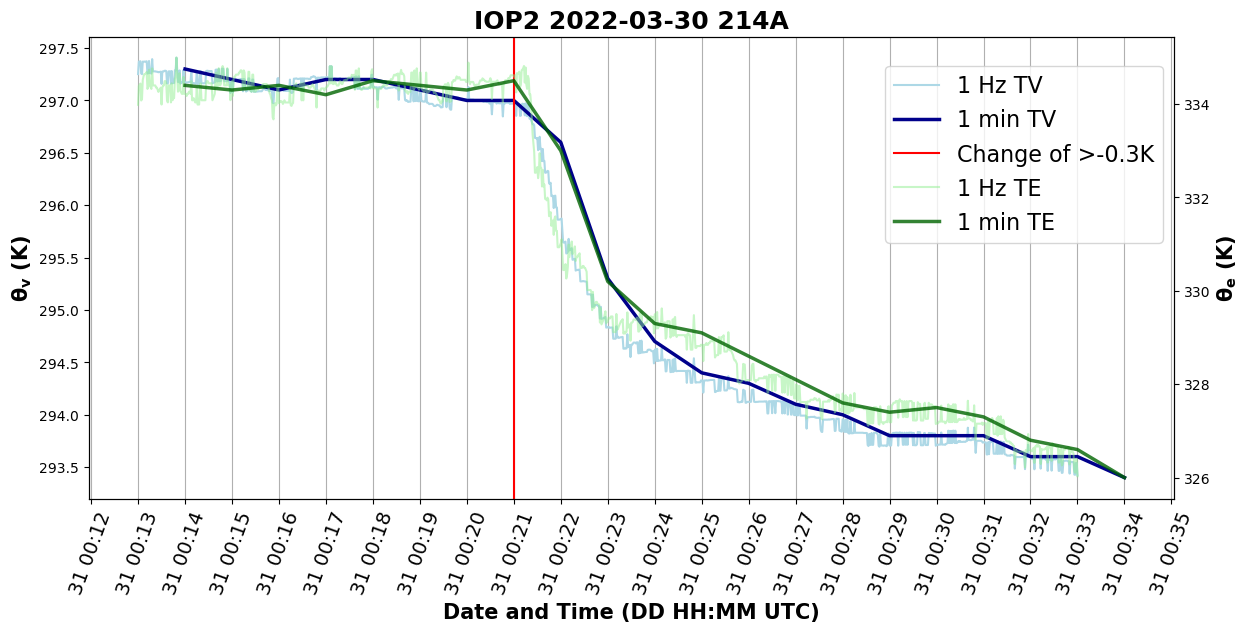

215A
14
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0215A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

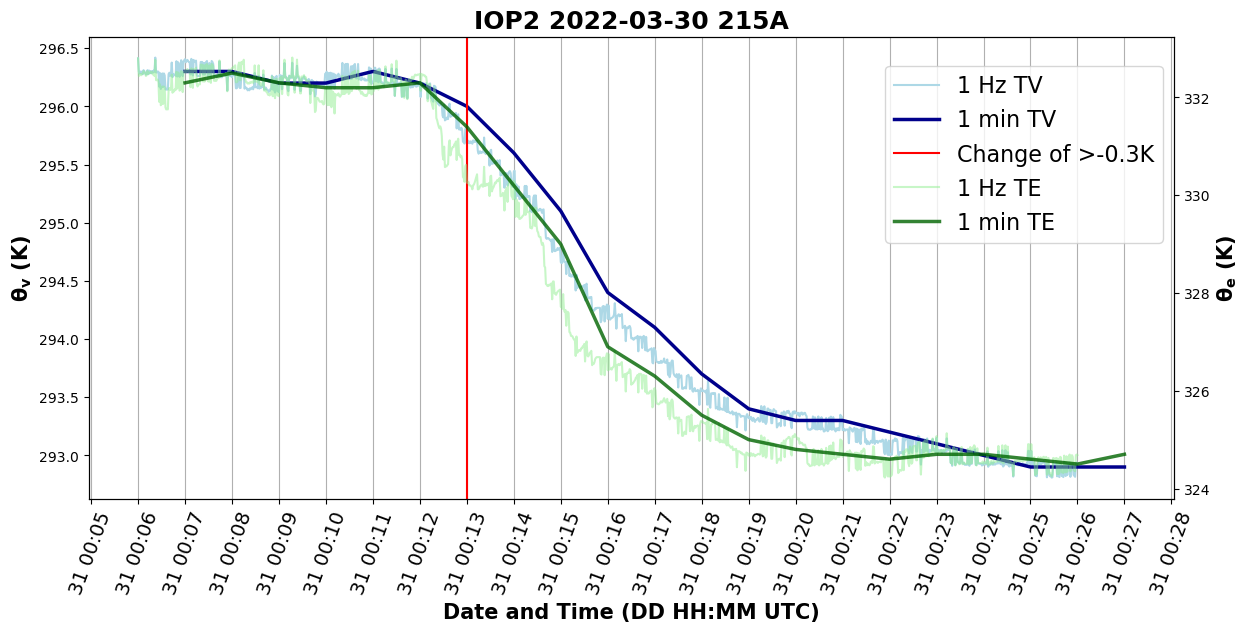

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


216A
15
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0216A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff1 = tv_1min[i+1] - tv_1min[i]


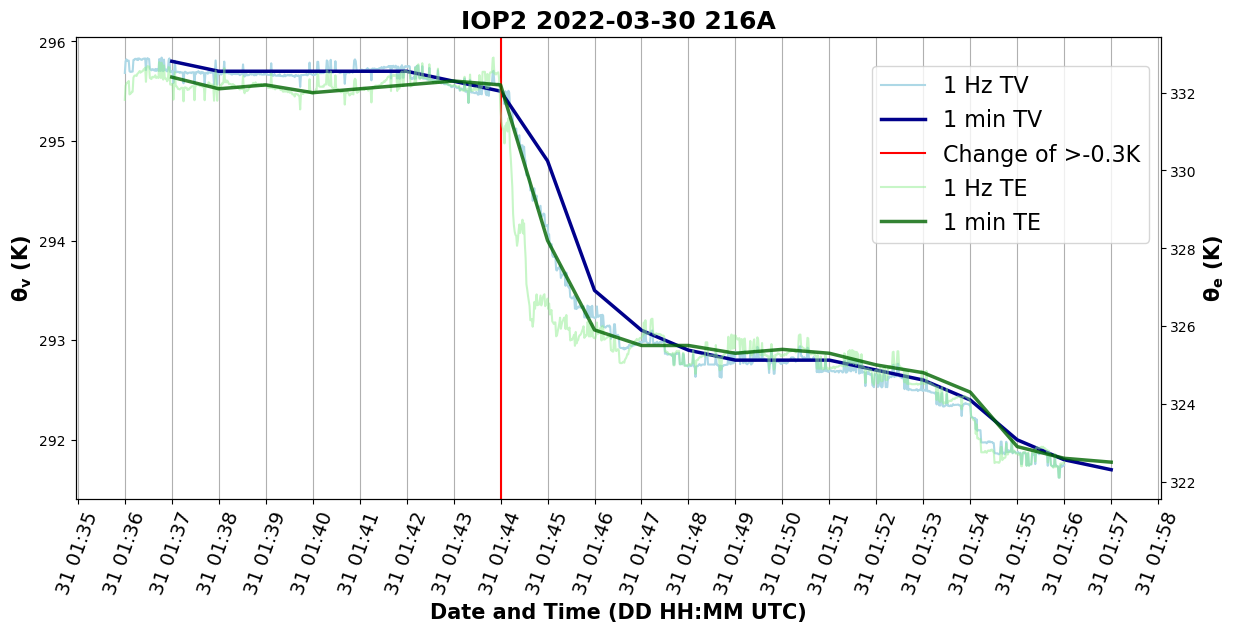

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


217A
16
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0217A_level3.txt


/Users/joshuaostaszewski/miniconda3/envs/phd/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff1 = tv_1min[i+1] - tv_1min[i]


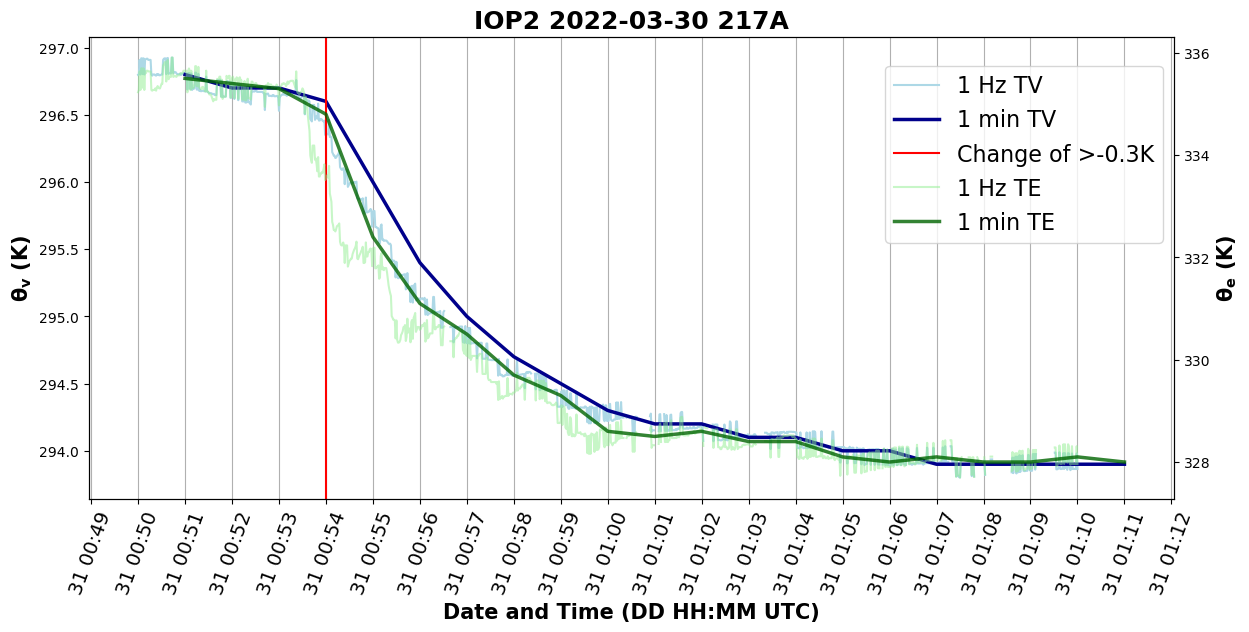

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


218A
17
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0218A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff1 = tv_1min[i+1] - tv_1min[i]


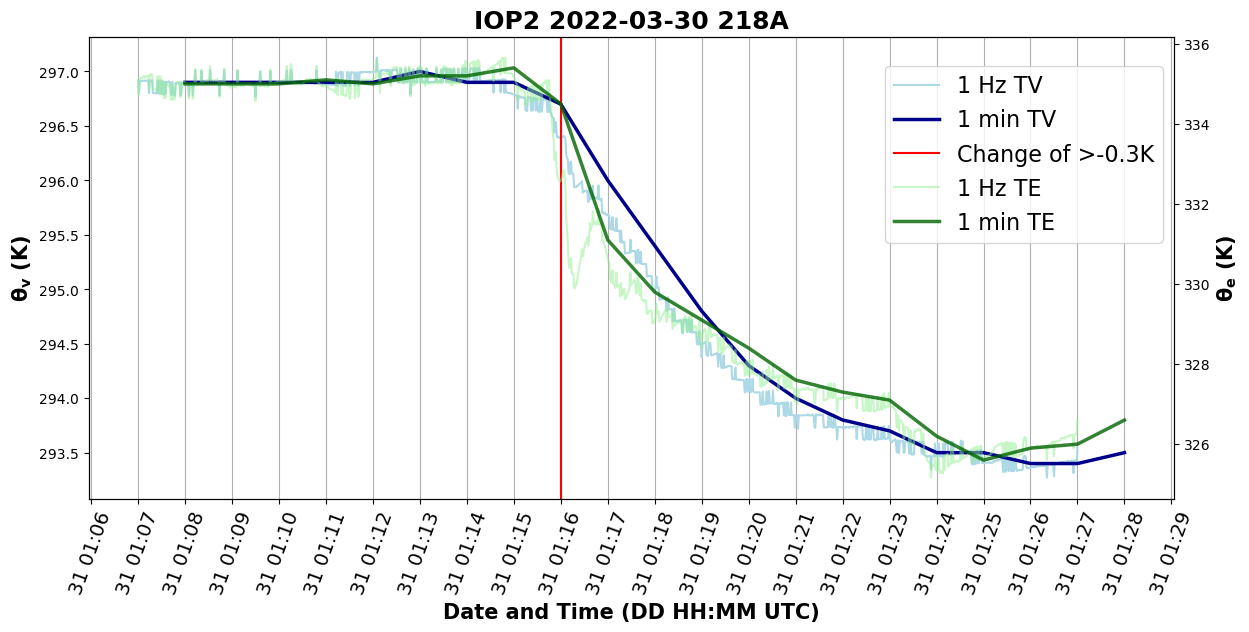

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


219A
18
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0219A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff1 = tv_1min[i+1] - tv_1min[i]


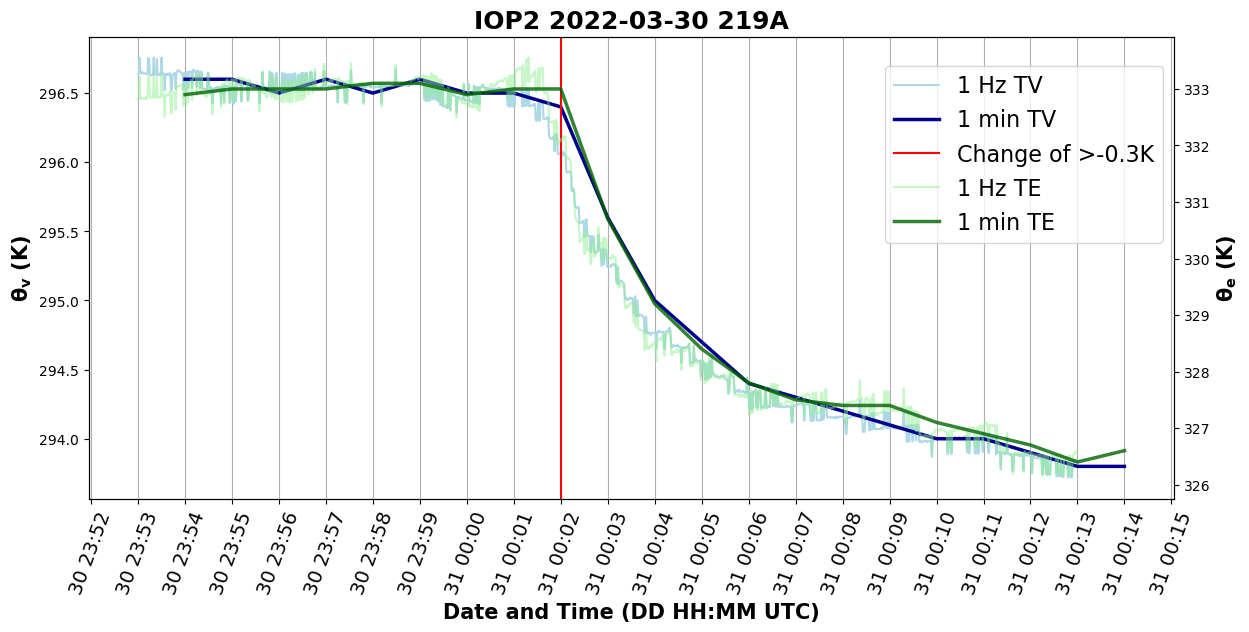

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

220A
19
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0220A_level3.txt


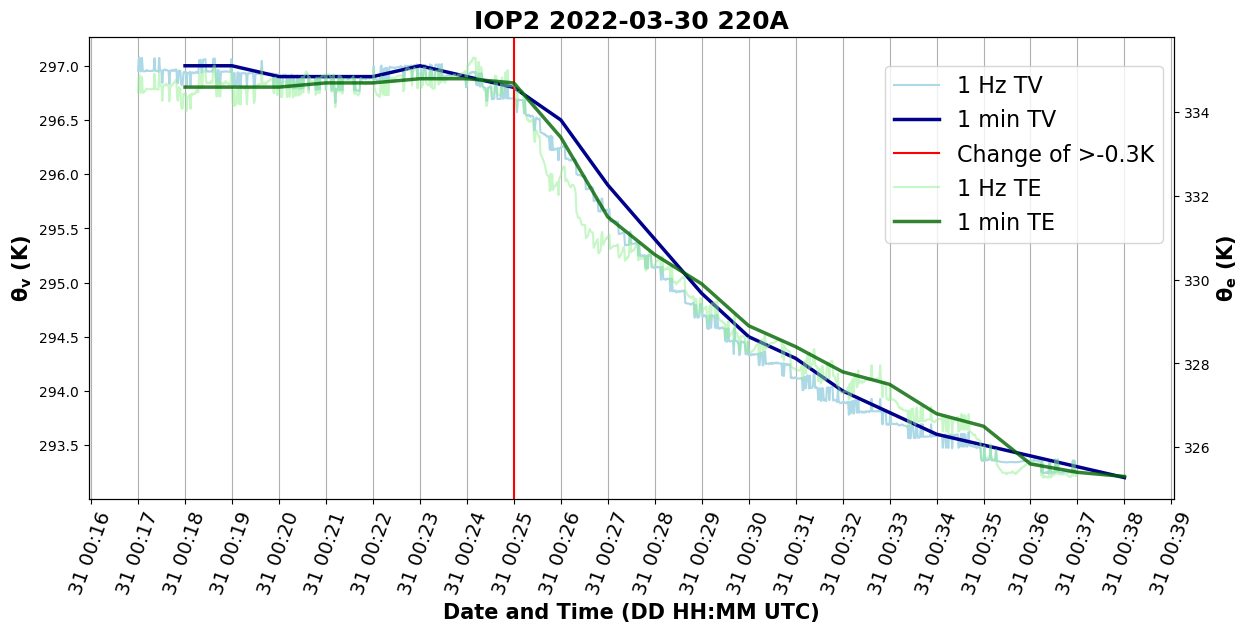

221A
20
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0221A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

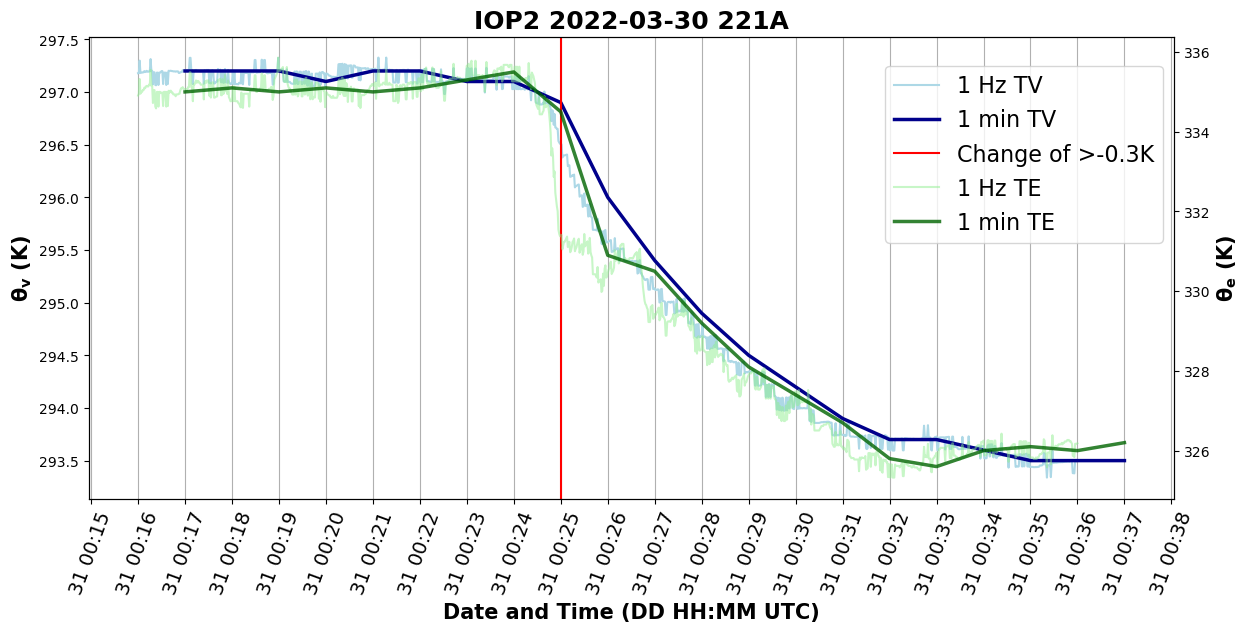

222A
21
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0222A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

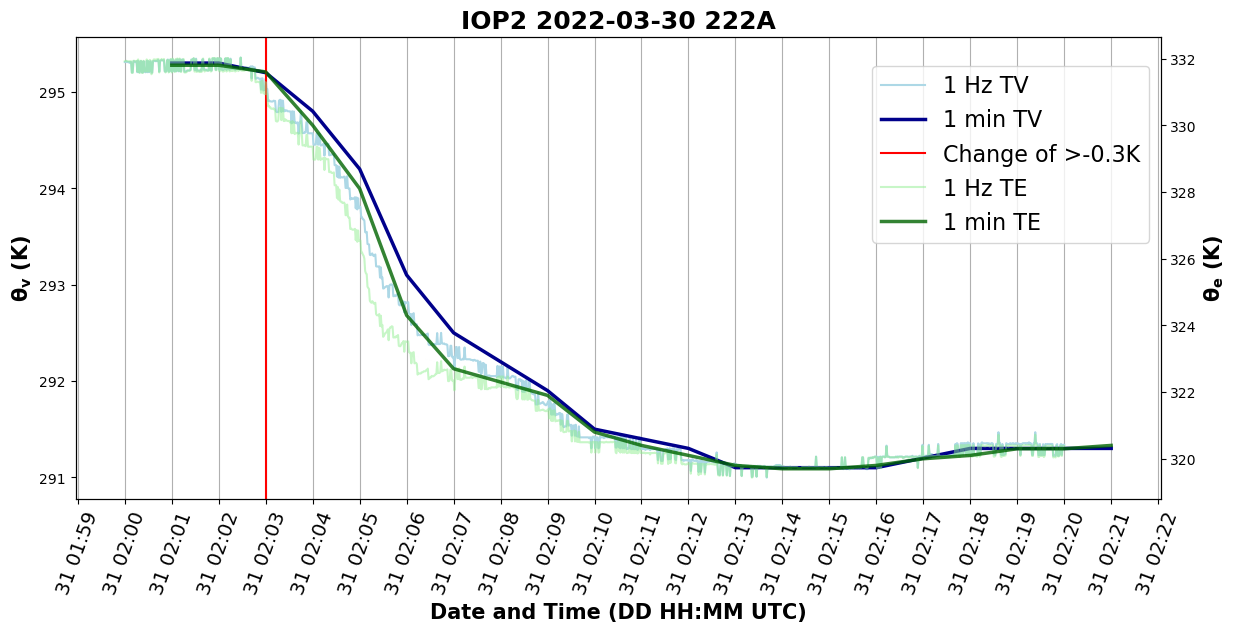

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


223A
22
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0223A_level3.txt


/Users/joshuaostaszewski/miniconda3/envs/phd/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff1 = tv_1min[i+1] - tv_1min[i]


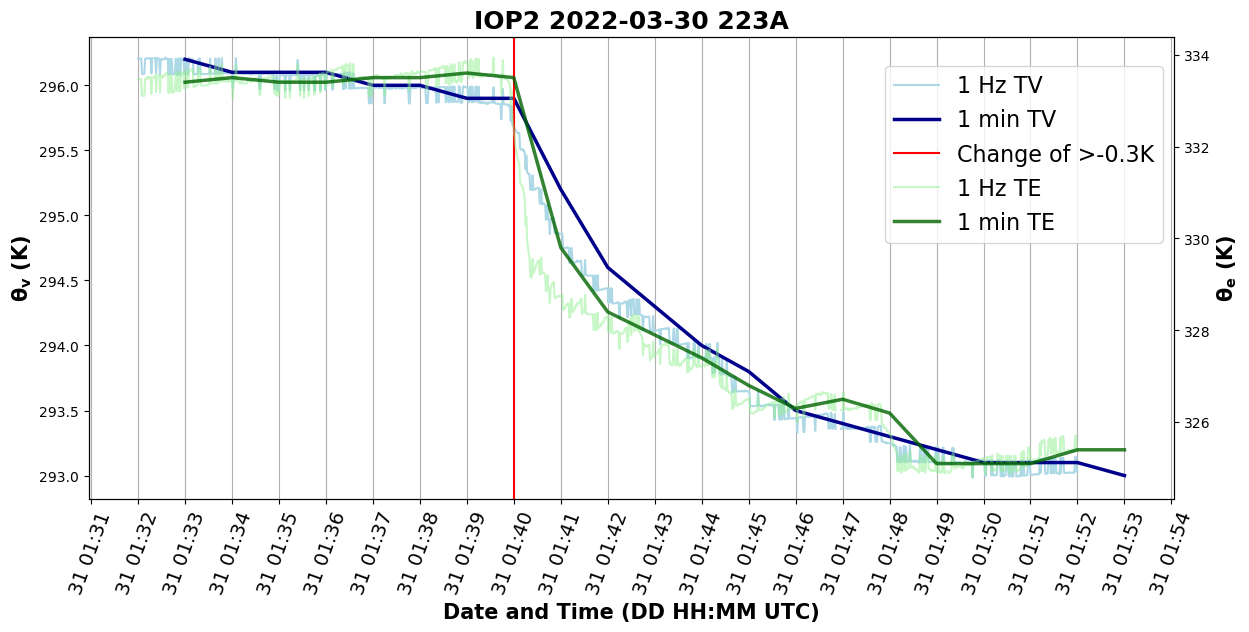

/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


224A
23
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0224A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = tv_1min[i+1] - tv_1min[i]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/1242260876.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff1 = tv_1min[i+1] - tv_1min[i]


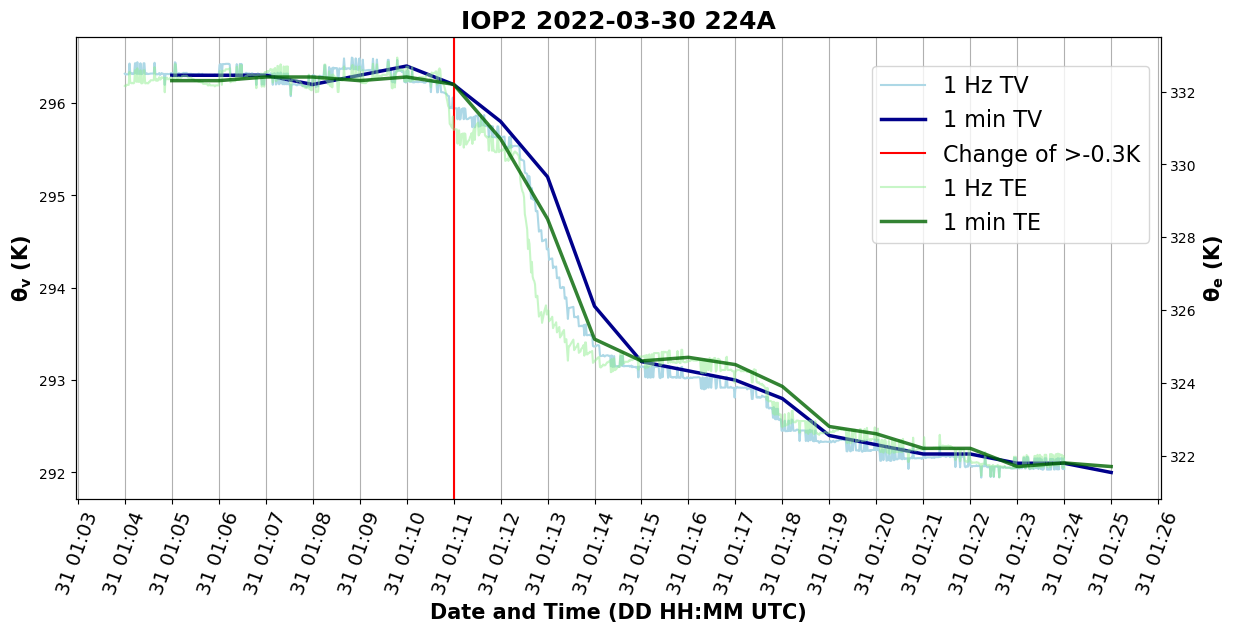

In [17]:
delta_k = {'2022-03-22':0.30,
           '2022-03-30':0.30,
           '2022-04-05':0.30,
           '2022-04-13':0.30,
          '2023-03-03':0.30,
          '2023-03-24':0.30,
          '2023-03-31':0.30,
          '2023-04-05':0.30}


for i in sns.index:
    # unpack data
    snid = sns.loc[i]['ID']
    print(snid)
    toa = pd.to_datetime(sns.loc[i]['TOA_coldpool'])
    date = (sns.loc[i]['date']).date()
    
    # get data around TOA -> 10 min on each side
    start = toa-dt.timedelta(minutes=10)
    duration=20
    met = get_1hz(date, i, start, duration)
    dewp = calc_dewpoint(met['T'],met['RH'])
    thetav = calc_thetav(met['T'], dewp, met['P'])
    thetae = calc_thetae(met['T'], dewp, met['P'])
    
    fig = figure(figsize=(14,6))
    plt.xticks(rotation=70, fontsize=14)
    ax = plt.gca()
    
    ax2 = ax.twinx()
    ax2.plot(pd.to_datetime(met.index), thetae, label='1 Hz TE', color='lightgreen', alpha=0.5)
    te_1min = np.round(thetae.resample('1Min', label='right').mean(),1)
    ax2.plot(te_1min.index, te_1min, color='darkgreen', linewidth=2.5, alpha=0.8, label='1 min TE')
    
    ax.plot(pd.to_datetime(met.index), thetav, color='lightblue', label='1 Hz TV')
    
    tv_1min = np.round(thetav.resample('1Min', label='right').mean(),1)
    ax.plot(tv_1min.index, tv_1min, color='darkblue', linewidth=2.5, label="1 min TV")
    
    xlocator = md.MinuteLocator(interval = 1)
    ax.xaxis.set_major_locator(xlocator)
    ax.grid(axis='x')
        
    # plot current toa
    #ax.axvline(toa, color='k', label='{}'.format(toa))
    
    # plot methods toa (note, some will be off. check with methods table in manuscript)
    change=[]
    dk = -1*delta_k[str(date)]
    for i,val in enumerate(tv_1min):
        if i < (len(tv_1min) - 1):
            diff = tv_1min[i+1] - tv_1min[i]
            if diff<=-0.29:
                diff = -0.3
                change.append(diff)
            else:
                change.append(diff)
    idx = np.where(np.asarray(change) <= dk)
    
    change1=[]
    dk1 = -(2/3)*delta_k[str(date)]
    dk1 = np.round(dk1, decimals=1)
    for i,val in enumerate(tv_1min):
        if i < (len(tv_1min) - 1):
            diff1 = tv_1min[i+1] - tv_1min[i]
            if diff1<=-0.19:
                diff1 = -0.2
                change1.append(diff1)
            else:
                change1.append(diff1)
    idx1 = np.where(np.asarray(change1) <= dk1)
    
    if not idx[0].any() and not idx1[0].any():
        change2=[]
        dk2 = -(1/3)*delta_k[str(date)]
        dk2 = np.round(dk2, decimals=1)
        for i,val in enumerate(tv_1min):
            if i < (len(tv_1min) - 1):
                diff2 = np.round((tv_1min[i+1] - tv_1min[i]),1)
                if diff2<=-0.09:
                    diff2 = -0.1
                    change2.append(diff2)
                else:
                    change2.append(diff2)
        idx2 = np.where(np.asarray(change2) <= dk2)
#         groups = [(k, sum(1 for _ in g)) for k, g in groupby(change2)]

#         cursor = 0
#         length = []
    

#         for k, l in groups:
#             if (l >= 2):
#                 if (k <=-0.1):
#                     index = groups.index((k,l))
#                     for x,y in groups[0:index]:
#                         position = (int(y))
#                         if len(position)>index:
#                             length1 = np.sum(position[0:index])
#                             lenght.append(length1)
#                         else:
#                             length1 = np.sum(position)
#                             length.append(length1)
    if len(idx[0])>0:
        ax.axvline(tv_1min.index[idx[0][0]], color='r',label='Change of >{}K'.format(dk))
    elif len(idx1[0])>0:
        ax.axvline(tv_1min.index[idx1[0][0]], color='r',label='Change of >{}K'.format(dk1))
    else:
        ax.axvline(tv_1min.index[idx2[0][0]], color='darkred',label='Change of >{}K'.format(dk2))
    
    plt.title('IOP2 '+'{} {}'.format(date, snid), fontsize=18, weight='bold')
    fig.legend(bbox_to_anchor=(0.4, 0., 0.5, 0.85),fontsize=16)
    ax.set_xlabel('Date and Time (DD HH:MM UTC)',fontsize=15,weight='bold')
    ax.set_ylabel(r'$\mathbf{{\theta_v}}$ (K)',fontsize=15,weight='bold')
    ax2.set_ylabel(r'$\mathbf{{\theta_e}}$ (K)',fontsize=15,weight='bold')
    plt.show()
    #fig.savefig(f'.png', format='png',bbox_inches='tight') #Change directory
    #plt.close()


### MAKE SURE ITS FOR MORE THAN +2 scans it k value is 0.1

# Calculating deficits 

There is some manual fixes for specific sticknets on where we find the base state.

In [21]:
def get_BSdist(SN, myvar):
    ''' finds the base state using a start (def_dist) and end (def_dist2) distance in km 
    (distance from TOA, which is placed at 0 m).
    
    myvar is either str TE or TV. '''
    
    if IOP == 'IOP1':
        if (SN.name == 3):
            def_dist = 20*1000 
            def_dist2 = 15*1000
        elif (SN.name == 5) | (SN.name == 6) | (SN.name == 7) | (SN.name == 16) | (SN.name == 17) | (SN.name == 18) | (SN.name == 30) | (SN.name == 31):
            def_dist = 27.5*1000 
            def_dist2 = 22.5*1000
        elif (SN.name == 9):
            def_dist = 22.5*1000 
            def_dist2 = 17.5*1000
        else:
            def_dist = 15*1000 
            def_dist2 = 10*1000 
            
    if IOP == 'IOP2':
        def_dist = 15*1000 
        def_dist2 = 10*1000
        
    if IOP == 'IOP3':
        if (SN.name == 0) | (SN.name == 2) | (SN.name == 4) | (SN.name == 9):
            def_dist = 5*1000 
            def_dist2 = 0*1000 
        elif (SN.name == 18) | (SN.name == 24) | (SN.name == 20):
            def_dist = 7.5*1000 
            def_dist2 = 2.5*1000 
        elif (SN.name == 6):
            def_dist = 10*1000 
            def_dist2 = 5*1000 
        else:
            def_dist = 15*1000 
            def_dist2 = 10*1000 
            
    if IOP == 'IOP4':
        def_dist = 15*1000 
        def_dist2 = 10*1000
        
    if int(SN.ID[1:3]) != SN.name+1:
        probe = int(SN.ID[1:3])-1
        starttime = pd.to_datetime(SN['TOA_coldpool_final']) - dt.timedelta(minutes=30)
        met = get_1hz(SN['date'], probe, starttime, 30) # pull 30 mins, should be more than enough
        u = SN['U']
        v = SN['V']
        storm_speed = np.sqrt(u**2 + v**2)
        delta_time = (met.index[:]-met.index[0]).seconds
        dist = storm_speed * delta_time # distance traveled
        dist = abs(dist-dist[-1]) # distance going back in time starting at toa

        start = np.where(abs(dist-def_dist) == abs(dist-def_dist).min())[0][0] # find where dist closest to 15
        end = np.where(abs(dist-def_dist2) == abs(dist-def_dist2).min())[0][0] # find where dist closest to 10
        change = np.nan

        #correction for short starts
        deldist = (def_dist-def_dist2) # delta distance from specified start and end distances
        if (end - start) < (deldist/storm_speed - 10) : # see if you have correct number of points
            start = 0
            ndist = storm_speed * delta_time
            end = np.where(abs(ndist-deldist) == abs(ndist-deldist).min())[0][0] # find 5 km from where data starts
            change = (ndist-ndist[-1])[0]


        dewp = calc_dewpoint(met['T'],met['RH'])
        if myvar == 'TV':
            var = calc_thetav(met['T'], dewp, met['P'])
        if myvar == 'TE':
            var = calc_thetae(met['T'], dewp, met['P'])

        bs = np.nanmean(var[start:end])
        
    else:
        starttime = pd.to_datetime(SN['TOA_coldpool_final']) - dt.timedelta(minutes=30)
        met = get_1hz(SN['date'], SN.name, starttime, 30) # pull 30 mins, should be more than enough 
        u = SN['U']
        v = SN['V']
        storm_speed = np.sqrt(u**2 + v**2)
        delta_time = (met.index[:]-met.index[0]).seconds
        dist = storm_speed * delta_time # distance traveled
        dist = abs(dist-dist[-1]) # distance going back in time starting at toa

        start = np.where(abs(dist-def_dist) == abs(dist-def_dist).min())[0][0] # find where dist closest to 15
        end = np.where(abs(dist-def_dist2) == abs(dist-def_dist2).min())[0][0] # find where dist closest to 10
        change = np.nan

        #correction for short starts
        deldist = (def_dist-def_dist2) # delta distance from specified start and end distances
        if (end - start) < (deldist/storm_speed - 10) : # see if you have correct number of points
            start = 0
            ndist = storm_speed * delta_time
            end = np.where(abs(ndist-deldist) == abs(ndist-deldist).min())[0][0] # find 5 km from where data starts
            change = (ndist-ndist[-1])[0]


        dewp = calc_dewpoint(met['T'],met['RH'])
        if myvar == 'TV':
            var = calc_thetav(met['T'], dewp, met['P'])
        if myvar == 'TE':
            var = calc_thetae(met['T'], dewp, met['P'])

        bs = np.nanmean(var[start:end])
    return  bs #met.index[start], met.index[end], change 

def get_distdef(SN, myvar, def_dist=15*1000):
    ''' finds minimum within cold pool at def_dist, which is the distance in km that the deficit is considered.
    default is 15km'''
    if int(SN.ID[1:3]) != SN.name+1:
        probe = int(SN.ID[1:3])-1
        starttime = pd.to_datetime(SN['TOA_coldpool_final'])
        met = get_1hz(SN['date'], probe, starttime, 30) # pull 30 mins, should be more than enough
        u = SN['U']
        v = SN['V']
        storm_speed = np.sqrt(u**2 + v**2)
        delta_time = (met.index[:]-met.index[0]).seconds
        dist = storm_speed * delta_time # distance traveled

        endtime = starttime + dt.timedelta(seconds=599) 

        # find where distance array is closest to 15km
        end = np.where(abs(dist-def_dist) == abs(dist-def_dist).min())[0][0]

        dewp = calc_dewpoint(met['T'],met['RH'])
        if myvar == 'TV':
            var = calc_thetav(met['T'], dewp, met['P'])
        if myvar == 'TE':
            var = calc_thetae(met['T'], dewp, met['P'])

        bs = get_BSdist(SN, myvar)

        minval = np.nanmin(var.iloc[0:end+1])

    else:
        starttime = pd.to_datetime(SN['TOA_coldpool_final'])
        met = get_1hz(SN['date'], SN.name, starttime, 30) # pull 30 mins, should be more than enough 
        u = SN['U']
        v = SN['V']
        storm_speed = np.sqrt(u**2 + v**2)
        delta_time = (met.index[:]-met.index[0]).seconds
        dist = storm_speed * delta_time # distance traveled

        endtime = starttime + dt.timedelta(seconds=599) 

        # find where distance array is closest to 10km
        end = np.where(abs(dist-def_dist) == abs(dist-def_dist).min())[0][0]

        dewp = calc_dewpoint(met['T'],met['RH'])
        if myvar == 'TV':
            var = calc_thetav(met['T'], dewp, met['P'])
        if myvar == 'TE':
            var = calc_thetae(met['T'], dewp, met['P'])

        bs = get_BSdist(SN, myvar)

        minval = np.nanmin(var.iloc[0:end+1])
    return  minval - bs #met.index[0], met.index[end]           
            

In [19]:
#sns = pd.read_csv('VSE_Data_1Hz_gradtv.csv')
sns['TE_dist'] = np.nan
sns['TV_dist'] = np.nan

for SN in sns.index:
    if np.isnan(sns.loc[SN]['U']) == False:
        sns.loc[SN,'TE_dist'] = np.round(get_distdef(sns.loc[SN], 'TE'),2)
        sns.loc[SN,'TV_dist'] = np.round(get_distdef(sns.loc[SN], 'TV'),2)

0
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0101A_level3.txt
0
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0101A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


0
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0101A_level3.txt
0
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0101A_level3.txt
1
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0102A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

1
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0102A_level3.txt
1
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0102A_level3.txt
1
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0102A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

2
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0103A_level3.txt
2
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0103A_level3.txt
2
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0103A_level3.txt
2
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0103A_level3.txt
3
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0104A_level3.txt
3
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0104A_level3.txt
3
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0104A_level3.txt
3
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0104A_level3.txt
4
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0105A_level3.txt
4
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0105A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

4
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0105A_level3.txt
4
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0105A_level3.txt
5
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0106A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

5
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0106A_level3.txt
5
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0106A_level3.txt
5
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0106A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

6
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0107A_level3.txt
6
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0107A_level3.txt
6
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0107A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

6
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0107A_level3.txt
7
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0108A_level3.txt
7
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0108A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/Users/joshuaostaszewski/miniconda3/envs/phd/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/

7
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0108A_level3.txt
7
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0108A_level3.txt
8
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0109A_level3.txt
8
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0109A_level3.txt
8
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0109A_level3.txt
8
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0109A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

9
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0110A_level3.txt
9
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0110A_level3.txt
9
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0110A_level3.txt
9
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0110A_level3.txt
10
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0111A_level3.txt
10
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0111A_level3.txt
10
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0111A_level3.txt
10
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0111A_level3.txt
11
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0112A_level3.txt
11
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0112A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

11
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0112A_level3.txt
11
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0112A_level3.txt
12
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0213A_level3.txt
12
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0213A_level3.txt
12
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0213A_level3.txt
12
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0213A_level3.txt
13
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0214A_level3.txt
13
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0214A_level3.txt
13
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0214A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

13
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0214A_level3.txt
14
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0215A_level3.txt
14
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0215A_level3.txt
14
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0215A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

14
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0215A_level3.txt
15
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0216A_level3.txt
15
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0216A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/Users/joshuaostaszewski/miniconda3/envs/phd/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/

15
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0216A_level3.txt
15
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0216A_level3.txt
16
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0217A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

16
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0217A_level3.txt
16
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0217A_level3.txt
16
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0217A_level3.txt
17
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0218A_level3.txt
17
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0218A_level3.txt
17
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0218A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

17
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0218A_level3.txt
18
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0219A_level3.txt
18
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0219A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

18
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0219A_level3.txt
18
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0219A_level3.txt
19
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0220A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

19
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0220A_level3.txt
19
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0220A_level3.txt
19
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0220A_level3.txt
20
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0221A_level3.txt
20
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0221A_level3.txt
20
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0221A_level3.txt
20
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0221A_level3.txt
21
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0222A_level3.txt
21
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0222A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

21
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0222A_level3.txt
21
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0222A_level3.txt
22
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0223A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' inste

22
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0223A_level3.txt
22
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0223A_level3.txt
22
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0223A_level3.txt


/Users/joshuaostaszewski/miniconda3/envs/phd/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/

23
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0224A_level3.txt
23
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0224A_level3.txt
23
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0224A_level3.txt
23
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0224A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)


20
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0221A_IOP4_level2.txt
20
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0221A_IOP4_level2.txt
20
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0221A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
23
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\02

In [20]:
sns

,IOP,date,ID,lat,lon,array_type,mode,MC_rel_toa,type,tor,...,Threshold,U,V,ref_angle,ref_contour,SM_mods,ref_mods,BS_mods,TE_dist,TV_dist
0,2,2022-03-30,101A,33.890050,-89.019192,Coarse,Mesovortex,NaN,R,NT,...,-3,16.7,23.8,9.9,46,NaN,NaN,NaN,-11.12,-7.16
1,2,2022-03-30,102A,33.167592,-88.539054,Coarse,Mesovortex,NaN,R,TOT,...,-3,18.7,21.3,-15.0,40,NaN,NaN,NaN,-8.17,-3.26
2,2,2022-03-30,103A,33.714987,-88.450477,Fine,Mesovortex,NaN,R,TOT,...,-3,16.0,24.0,-17.3,43,NaN,NaN,NaN,-8.76,-3.64
3,2,2022-03-30,104A,33.818643,-88.461089,Fine,Mesovortex,NaN,R,TOT,...,-3,18.7,24.0,-17.1,43,NaN,1.0,NaN,-6.88,-3.44
4,2,2022-03-30,105A,33.535339,-89.124273,Coarse,Mesovortex,NaN,R,NT,...,-3,16.7,19.0,-12.8,40,NaN,NaN,NaN,-5.53,-4.80
5,2,2022-03-30,106A,33.888094,-88.729118,Coarse,Mesovortex,NaN,R,NT,...,-3,19.0,23.8,-15.3,40,NaN,NaN,NaN,-5.99,-4.29
6,2,2022-03-30,107A,33.588088,-88.666433,Coarse,Mesovortex,NaN,R,NT,...,-3,15.2,20.3,-16.0,43,NaN,NaN,NaN,-9.29,-4.22
7,2,2022-03-30,108A,34.178948,-89.032192,Coarse,Mesovortex,NaN,R,Post,...,-3,16.7,26.2,-8.0,40,NaN,NaN,NaN,-6.95,-4.43
8,2,2022-03-30,109A,34.267943,-88.767288,Coarse,Mesovortex,NaN,R,NT,...,-3,17.2,22.1,-2.4,45,NaN,-1.0,NaN,-10.01,-5.82
9,2,2022-03-30,110A,33.757437,-88.445230,Fine,Mesovortex,NaN,R,TOT,...,-3,18.7,26.7,-16.3,40,NaN,NaN,NaN,-7.75,-3.15


# Calculating gradients

You will need the U and V columns in the csv (calculated storm motion) to find the true gradient.

In [22]:
def get_correction_angle(u, v, ref):
    ''' ref is the storm reflectivity angle'''
    theta_motion = np.rad2deg(np.arctan(v/u))
    if (theta_motion < 0) & (ref < 0):
        theta_correction = np.deg2rad(abs(ref) - abs(theta_motion)) 
    else:
        theta_correction = np.deg2rad(abs(ref - theta_motion))
  
    return theta_correction

def findnearest(array, value):
    array = np.asarray(array)
    return (np.abs(array-value)).argmin()

def get_tvgrad(SN, distance, pretoa=2*1000, posttoa=10*1000):
    ''' SN is the sticknet data
    pretoa is meters before toa to start using data
    posttoa is meters after toa to stop using data
    distance is distance in meters to calculate the max thetav change. This should equal 1000 if you 
    want to be consistent with McDonald and Weiss 2021'''
    
    # check for empty files
    ref = SN['ref_angle']
    
    if np.isnan(ref)!= True:
    
        snid = SN['ID']
        print(snid)
        u = SN['U']
        v = SN['V']
        storm_speed = np.sqrt(u**2 + v**2)
        date = SN['date']
        toa = pd.to_datetime(SN['TOA_coldpool_final'])
        # grab time 15 minutes before toa and 30 minutes after, should be big enough buffer
        duration = 45 # note: found bug on 3/25/2020... duration was not set and was still 20(?). However,
                      # this does not change any of the values so we good
        if int(SN.ID[1:3]) != SN.name+1:
            probe = int(SN.ID[1:3])-1
            met = get_1hz(SN['date'], probe, toa - dt.timedelta(minutes=15), 45)
            dewp = calc_dewpoint(met['T'], met['RH'])
            tv = calc_thetav(met['T'], dewp, met['P'])

            # create distance array based on correction angle
            delta_time = (met.index[:]-met.index[0]).seconds
            dist = storm_speed * delta_time
            theta_c = get_correction_angle(u,v,ref)
            new_dist = dist * np.cos(theta_c)
            print(np.cos(theta_c))
            # center new_dist on TOA, negative values are before TOA, postive are after
            toa_idx = np.where(met.index==toa)[0][0]
            new_dist = new_dist - new_dist[toa_idx]
            start_idx = findnearest(new_dist, -1*pretoa)
            end_idx = findnearest(new_dist, posttoa)
            new_dist = new_dist[start_idx: end_idx]
            tv = tv[start_idx:end_idx]
            # create array to hold start and end indices equal to 1 km distance
            idx = []
            counter = 0
            for i, val in enumerate(new_dist[:]):
                i2 = findnearest(new_dist, val+distance)
                if i2 == duration*60: 
                    counter+=1
                if counter > 1: # if max index is used more than once, then skip everything else
                    idx.append([np.nan, np.nan])
                if counter <=1:
                    idx.append([i,i2])
            dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
            # EDIT 8 Sept 2020... I realized this wasnt divided by distance. It doesn't matter because
            # I had (THANK GOODNESS) been using 1 km distance, but I needed the edit now that I'm varying
            # the distance
            if len(dTV_dn)>0:
                grad = np.nanmin(dTV_dn)
            else:
                grad = np.nan
                
                
        else:
            met = get_1hz(SN['date'], SN.name, toa - dt.timedelta(minutes=15), 45)
            dewp = calc_dewpoint(met['T'], met['RH'])
            tv = calc_thetav(met['T'], dewp, met['P'])

            # create distance array based on correction angle
            delta_time = (met.index[:]-met.index[0]).seconds
            dist = storm_speed * delta_time
            theta_c = get_correction_angle(u,v,ref)
            new_dist = dist * np.cos(theta_c)
            print(np.cos(theta_c))
            # center new_dist on TOA, negative values are before TOA, postive are after
            toa_idx = np.where(met.index==toa)[0][0]
            new_dist = new_dist - new_dist[toa_idx]

            start_idx = findnearest(new_dist, -1*pretoa)
            end_idx = findnearest(new_dist, posttoa)
            new_dist = new_dist[start_idx: end_idx]
            tv = tv[start_idx:end_idx]

            # create array to hold start and end indices equal to 1 km distance
            idx = []
            counter = 0
            for i, val in enumerate(new_dist[:]):
                i2 = findnearest(new_dist, val+distance)
                if i2 == duration*60: 
                    counter+=1
                if counter > 1: # if max index is used more than once, then skip everything else
                    idx.append([np.nan, np.nan])
                if counter <=1:
                    idx.append([i,i2])

            dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
            # EDIT 8 Sept 2020... I realized this wasnt divided by distance. It doesn't matter because
            # I had (THANK GOODNESS) been using 1 km distance, but I needed the edit now that I'm varying
            # the distance
            if len(dTV_dn)>0:
                grad = np.nanmin(dTV_dn)
            else:
                grad = np.nan
    else:
        snid = SN['ID']
        print(snid)
        grad = np.nan
    return snid, grad   #met.index[start_idx], met.index[end_idx]   

In [23]:
#sns = pd.read_csv('VSE_Data_1Hz_thermo_distance.csv', na_values=-999)

# sns['dTVdn'] = np.nan
for SN in sns.index:
    sticknet, grad = get_tvgrad(sns.loc[SN], 1000) # 1 km spacing
    sns.loc[SN,'dTVdn'] = np.round(grad,2)

101A
0
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0101A_level3.txt
0.7065709269435809
102A
1
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0102A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_form

0.4427739746250385
103A
2
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0103A_level3.txt
0.2821751513272574
104A
3
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0104A_level3.txt
0.35550720786289214
105A
4
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0105A_level3.txt
0.47736995048590863
106A
5
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0106A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will a

0.3955622276702555
107A
6
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0107A_level3.txt
0.35551012032611284
108A
7
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0108A_level3.txt
0.41490959094653573


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will a

109A
8
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0109A_level3.txt
0.5806024629143546
110A
9
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0110A_level3.txt
0.3207191193290404
111A
10
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0111A_level3.txt
0.33062013939439655
112A
11
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0112A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will a

0.41786707380107685
213A
12
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0213A_level3.txt
0.3207191193290404
214A
13
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0214A_level3.txt
0.2707083096638053
215A
14
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0215A_level3.txt
0.016659588192458923
216A
15
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0216A_level3.txt


/Users/joshuaostaszewski/miniconda3/envs/phd/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_da

0.7604059656000309
217A
16
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0217A_level3.txt
0.19367996769629192
218A
17
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0218A_level3.txt


/Users/joshuaostaszewski/miniconda3/envs/phd/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_da

0.22608700681677119
219A
18
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0219A_level3.txt
0.36206995180257445
220A
19
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0220A_level3.txt
0.2528638869008509
221A
20
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0221A_level3.txt
0.2579262254661929
222A
21
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0222A_level3.txt


/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will a

0.2794728247012313
223A
22
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0223A_level3.txt
0.12643714268859388
224A
23
/Volumes/JoshDrive/PERiLS_Y1/Data/PERiLS_data/IOP_data/IOP2_20220330/level3/0224A_level3.txt
0.497013540437223


/Users/joshuaostaszewski/miniconda3/envs/phd/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/420564549.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
/var/folders/_9/0mq_5_4s7hlbd_l0vcwcw3j40000gn/T/ipykernel_70377/75543949.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_da

In [24]:
sns

,IOP,date,ID,lat,lon,array_type,mode,MC_rel_toa,type,tor,...,U,V,ref_angle,ref_contour,SM_mods,ref_mods,BS_mods,TE_dist,TV_dist,dTVdn
0,2,2022-03-30,101A,33.890050,-89.019192,Coarse,Mesovortex,NaN,R,NT,...,16.7,23.8,9.9,46,NaN,NaN,NaN,-11.12,-7.16,-3.24
1,2,2022-03-30,102A,33.167592,-88.539054,Coarse,Mesovortex,NaN,R,TOT,...,18.7,21.3,-15.0,40,NaN,NaN,NaN,-8.17,-3.26,-0.87
2,2,2022-03-30,103A,33.714987,-88.450477,Fine,Mesovortex,NaN,R,TOT,...,16.0,24.0,-17.3,43,NaN,NaN,NaN,-8.76,-3.64,-1.29
3,2,2022-03-30,104A,33.818643,-88.461089,Fine,Mesovortex,NaN,R,TOT,...,18.7,24.0,-17.1,43,NaN,1.0,NaN,-6.88,-3.44,-2.20
4,2,2022-03-30,105A,33.535339,-89.124273,Coarse,Mesovortex,NaN,R,NT,...,16.7,19.0,-12.8,40,NaN,NaN,NaN,-5.53,-4.80,-1.17
5,2,2022-03-30,106A,33.888094,-88.729118,Coarse,Mesovortex,NaN,R,NT,...,19.0,23.8,-15.3,40,NaN,NaN,NaN,-5.99,-4.29,-1.58
6,2,2022-03-30,107A,33.588088,-88.666433,Coarse,Mesovortex,NaN,R,NT,...,15.2,20.3,-16.0,43,NaN,NaN,NaN,-9.29,-4.22,-1.29
7,2,2022-03-30,108A,34.178948,-89.032192,Coarse,Mesovortex,NaN,R,Post,...,16.7,26.2,-8.0,40,NaN,NaN,NaN,-6.95,-4.43,-1.09
8,2,2022-03-30,109A,34.267943,-88.767288,Coarse,Mesovortex,NaN,R,NT,...,17.2,22.1,-2.4,45,NaN,-1.0,NaN,-10.01,-5.82,-2.81
9,2,2022-03-30,110A,33.757437,-88.445230,Fine,Mesovortex,NaN,R,TOT,...,18.7,26.7,-16.3,40,NaN,NaN,NaN,-7.75,-3.15,-1.12


### plots to check methods work

make sure the deficit, base state, or grad tv functions are returning times and not values

In [25]:
# deficits


savedir= 'E:\\PERiLS_Y2\\methods\\BS_DF\\IOP4\\'

#sns = pd.read_csv('VSE_Data_1Hz.csv', na_values='-999' )
#sns = pd.read_csv(SNSfile, na_values='-999' )

for SN in sns.index:
    if np.isnan(sns.loc[SN]['U']) == False:
        # unpack data
        snid = sns.loc[SN]['ID']
        print(snid)
        toa = pd.to_datetime(sns.loc[SN]['TOA_coldpool_final'])
        date = sns.loc[SN]['date']

        # get data around TOA -> 10 min on each side
        start = toa-dt.timedelta(minutes=20)
        duration=40
        if int(sns.loc[SN].ID[1:3]) != sns.loc[SN].name+1:
            probe = int(sns.loc[SN].ID[1:3])-1
            met = get_1hz(sns.loc[SN]['date'], probe, start, duration)
            dewp = calc_dewpoint(met['T'],met['RH'])

            thetav = calc_thetav(met['T'], dewp, met['P'])
            thetae = calc_thetae(met['T'], dewp, met['P'])

            fig = figure(figsize=(14,6))
            plt.xticks(rotation=90, fontsize=12)
            ax = plt.gca()

            ax2 = ax.twinx()
            ax2.plot(pd.to_datetime(met.index), thetae, label='1 Hz TE', color='C2', alpha=0.5)
            te_1min = np.round(thetae.resample('1Min', label='right').mean(),1)
            ax2.plot(te_1min.index, te_1min, color='C2', linewidth=2.5, alpha=0.8)

            ax.plot(pd.to_datetime(met.index), thetav, label='1 Hz TV')

            tv_1min = np.round(thetav.resample('1Min', label='right').mean(),1)
            ax.plot(tv_1min.index, tv_1min, color='darkblue', linewidth=2.5, label="1 min TV")

            xlocator = md.MinuteLocator(interval = 1)
            ax.xaxis.set_major_locator(xlocator)
            ax.grid(axis='x')

            ax.axvline(toa, color='k', label='{}'.format(toa.strftime('%H%M UTC')))
            plt.title('{} {}'.format(date, snid), fontsize=18, weight='bold')
            ax.legend(fontsize=16)

            # old methods
    #         axvspan(toa-dt.timedelta(minutes=20),toa-dt.timedelta(minutes=15), color='k', alpha=0.1)
    #         axvspan(toa,toa+dt.timedelta(minutes=10), color='k', alpha=0.1)

            # new methods
            bsstart, bsend, change= get_BSdist(sns.loc[SN], 'TV')
            defstart, defend = get_distdef(sns.loc[SN], 'TV')

            axvspan(bsstart, bsend, color='C0', alpha=0.25 )
            axvspan(defstart, defend, color='C0', alpha=0.2 )

            # check for change in base state method
            if bsstart == met.index[0]:
                ax.text(toa-dt.timedelta(minutes=20), np.min(thetav)+.2,
                        'BS start: {} m'.format(-1*np.round(change,0)), fontsize=18)
            plt.savefig('{}{}.png'.format(savedir,snid), bbox_inches='tight')
            plt.close()
        else:
            met = get_1hz(sns.loc[SN]['date'], sns.loc[SN].name, start, duration)
            dewp = calc_dewpoint(met['T'],met['RH'])

            thetav = calc_thetav(met['T'], dewp, met['P'])
            thetae = calc_thetae(met['T'], dewp, met['P'])

            fig = figure(figsize=(14,6))
            plt.xticks(rotation=90, fontsize=12)
            ax = plt.gca()

            ax2 = ax.twinx()
            ax2.plot(pd.to_datetime(met.index), thetae, label='1 Hz TE', color='C2', alpha=0.5)
            te_1min = np.round(thetae.resample('1Min', label='right').mean(),1)
            ax2.plot(te_1min.index, te_1min, color='C2', linewidth=2.5, alpha=0.8)

            ax.plot(pd.to_datetime(met.index), thetav, label='1 Hz TV')

            tv_1min = np.round(thetav.resample('1Min', label='right').mean(),1)
            ax.plot(tv_1min.index, tv_1min, color='darkblue', linewidth=2.5, label="1 min TV")

            xlocator = md.MinuteLocator(interval = 1)
            ax.xaxis.set_major_locator(xlocator)
            ax.grid(axis='x')

            ax.axvline(toa, color='k', label='{}'.format(toa.strftime('%H%M UTC')))
            plt.title('{} {}'.format(date, snid), fontsize=18, weight='bold')
            ax.legend(fontsize=16)

            # old methods
    #         axvspan(toa-dt.timedelta(minutes=20),toa-dt.timedelta(minutes=15), color='k', alpha=0.1)
    #         axvspan(toa,toa+dt.timedelta(minutes=10), color='k', alpha=0.1)

            # new methods
            bsstart, bsend, change= get_BSdist(sns.loc[SN], 'TV')
            defstart, defend = get_distdef(sns.loc[SN], 'TV')

            axvspan(bsstart, bsend, color='C0', alpha=0.25 )
            axvspan(defstart, defend, color='C0', alpha=0.2 )

            # check for change in base state method
            if bsstart == met.index[0]:
                ax.text(toa-dt.timedelta(minutes=20), np.min(thetav)+.2,
                        'BS start: {} m'.format(-1*np.round(change,0)), fontsize=18)
            plt.savefig('{}{}.png'.format(savedir,snid), bbox_inches='tight')
            plt.close()

101A
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
102A
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
103A
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2

222B
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
222C
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
223B
22
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0223A_IOP4_level2.txt
22
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0223A_IOP4_level2.txt
22
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0223A_IOP4_level2.txt
22
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_202

In [26]:
# theta v gradients

savedir = 'E:\\PERiLS_Y2\\methods\\GRAD\\IOP4\\'

for SN in sns.index:
    if np.isnan(sns.loc[SN]['U']) == False:
        # unpack data
        snid = sns.loc[SN]['ID']
        toa = pd.to_datetime(sns.loc[SN]['TOA_coldpool_final'])
        date = sns.loc[SN]['date']
        print(snid)
        # get data around TOA -> 10 min on each side
        start = toa-dt.timedelta(minutes=20)
        duration=40
        if int(sns.loc[SN].ID[1:3]) != sns.loc[SN].name+1:
            probe = int(sns.loc[SN].ID[1:3])-1
            met = get_1hz(sns.loc[SN]['date'], probe, start, duration)
        
            dewp = calc_dewpoint(met['T'],met['RH'])


            thetav = calc_thetav(met['T'], dewp, met['P'])
            thetae = calc_thetae(met['T'], dewp, met['P'])

            fig = figure(figsize=(14,6))
            plt.xticks(rotation=90, fontsize=12)
            ax = plt.gca()

            ax2 = ax.twinx()
            ax2.plot(pd.to_datetime(met.index), thetae, label='1 Hz TE', color='C2', alpha=0.5)
            te_1min = np.round(thetae.resample('1Min', label='right').mean(),1)
            ax2.plot(te_1min.index, te_1min, color='C2', linewidth=2.5, alpha=0.8)

            ax.plot(pd.to_datetime(met.index), thetav, label='1 Hz TV')

            tv_1min = np.round(thetav.resample('1Min', label='right').mean(),1)
            ax.plot(tv_1min.index, tv_1min, color='darkblue', linewidth=2.5, label="1 min TV")

            xlocator = md.MinuteLocator(interval = 1)
            ax.xaxis.set_major_locator(xlocator)
            ax.grid(axis='x')

            ax.axvline(toa, color='k', label='{}'.format(toa.strftime('%H%M UTC')))
            plt.title('{} {}'.format(date, snid), fontsize=18, weight='bold')
            ax.legend(fontsize=16)


            # new methods
            gradstart, gradend = get_tvgrad(sns.loc[SN], 1000, posttoa=10*1000) 

            axvspan(gradstart, gradend, color='C0', alpha=0.25 )

            plt.savefig('{}{}.png'.format(savedir, snid), bbox_inches='tight')
            plt.close()
        else:
            
            met = get_1hz(sns.loc[SN]['date'], sns.loc[SN].name, start, duration)
            dewp = calc_dewpoint(met['T'],met['RH'])
       
            
            thetav = calc_thetav(met['T'], dewp, met['P'])
            thetae = calc_thetae(met['T'], dewp, met['P'])

            fig = figure(figsize=(14,6))
            plt.xticks(rotation=90, fontsize=12)
            ax = plt.gca()

            ax2 = ax.twinx()
            ax2.plot(pd.to_datetime(met.index), thetae, label='1 Hz TE', color='C2', alpha=0.5)
            te_1min = np.round(thetae.resample('1Min', label='right').mean(),1)
            ax2.plot(te_1min.index, te_1min, color='C2', linewidth=2.5, alpha=0.8)

            ax.plot(pd.to_datetime(met.index), thetav, label='1 Hz TV')

            tv_1min = np.round(thetav.resample('1Min', label='right').mean(),1)
            ax.plot(tv_1min.index, tv_1min, color='darkblue', linewidth=2.5, label="1 min TV")

            xlocator = md.MinuteLocator(interval = 1)
            ax.xaxis.set_major_locator(xlocator)
            ax.grid(axis='x')

            ax.axvline(toa, color='k', label='{}'.format(toa.strftime('%H%M UTC')))
            plt.title('{} {}'.format(date, snid), fontsize=18, weight='bold')
            ax.legend(fontsize=16)


            # new methods
            gradstart, gradend = get_tvgrad(sns.loc[SN], 1000, posttoa=10*1000) 

            axvspan(gradstart, gradend, color='C0', alpha=0.25 )

            plt.savefig('{}{}.png'.format(savedir, snid), bbox_inches='tight')
            plt.close()

101A
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
101A
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0.7778733156423482
102A
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
102A
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
0.7467700520776268
103A
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
103A
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
0.5474814469683164
104A
3
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0104A_IOP4_level2.txt
104A
3
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0104A_IOP4_level2.txt
0.6832162395496673
105A
4
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0105A_IOP4_level2.txt
105A
4
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0105A_IOP4_level2.txt
0.3321245228451988
106A
5
E:\PERiL